In [ ]:
import torch
from matplotlib import pyplot as plt
from math import ceil

#画损失函数图
def plot_curve(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['value'], loc='upper right')
    plt.xlabel('step')
    plt.ylabel('value')
    plt.savefig("/kaggle/working/loss.jpg")
    plt.show()


#画出每一个batchsize中的图片
def plot_image(img,label,idx,pred=None):
#     pred = torch.tensor(round(pred.item(), 3))
    fig = plt.figure()
    for i in range(len(img)):
        plt.subplot(ceil(len(img)**0.5), ceil(len(img)**0.5), i + 1)
        plt.tight_layout()
        plt.imshow(img[i].transpose(0,1).transpose(1,2))
        if(pred is not None):plt.title("time:{}, true:{}, predict:{}".format(idx.item(),round(label[i].item(),3),round(pred[i].item(), 3)))
        else:plt.title("{} D.C.".format(label[i].item()))
        plt.xticks([])
        plt.yticks([])
        plt.savefig('/kaggle/working/{}.jpg'.format(idx.item()))
    plt.show()

In [2]:
import os
from glob import glob
from torchvision import transforms as tr
from torch.utils.data import DataLoader,Dataset
from PIL import Image

#加载本地数据的类
class LocalDataset(Dataset):
    def __init__(self, data_list, label,transform=None):
        self.transform = transform
        self.x = data_list
        self.label = label

    def __getitem__(self, index):
        img = Image.open(self.x[index]).convert('RGB')
        if self.transform is not None:img = self.transform(img)
        return img[:,15:,:],torch.tensor(self.label.iloc[int(self.x[index][-8:-4])-110,[5]]), int(self.x[index][-8:-4])-110

    def __len__(self):
        return len(self.x)

#加载本地的数据集
def local_datasets(data_path,label,bt,PM,NM=0):
    numclass_path = glob(os.path.join(data_path, '*'))

    data_transform = {"train": tr.Compose([
        tr.Resize((329,428)),
        tr.ToTensor()])}

    train_dataset = LocalDataset(numclass_path,label,transform=data_transform["train"])
    train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=bt, shuffle=False,num_workers=NM,pin_memory=PM)

    return train_loader

In [3]:
import pandas as pd
label = pd.read_excel("/kaggle/input/apcmc/Attachment 2.xlsx")
train_loader= local_datasets('/kaggle/input/apcmc/Attachment 1/Attachment 1',label,1,True)

In [4]:
import torch.nn as nn
from torchvision import transforms, datasets
import json
import torch.optim as optim
import time
from torch.optim import lr_scheduler
import torchvision.models as models

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

resnet18_regress = models.resnet18(pretrained=False)
resnet18_regress.fc=torch.nn.Linear(in_features=512, out_features=1, bias=True)

net=resnet18_regress.to(device)
# net = torch.load("/kaggle/working/Net1_961.6232820264995.pth",map_location=device)

less_valloss = 10000.0
loss_function = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001,weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer,step_size=2,gamma = 0.9)


data=[]
for epoch in range(100): 
    #break
    train_loss = 0.0
    net.train()
    for step1,(x,label,index)in enumerate(train_loader):
        if index >= 40:
            optimizer.zero_grad()
            outputs = net(x.to(torch.float32).to(device))
            loss = loss_function(outputs, label.to(torch.float32).to(device))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
    data.append(train_loss)

    scheduler.step()
    print('epoch:',epoch+1,'train_loss:',train_loss)
    if
        torch.save(net, './Net2_%s.pth'%train_loss)

epoch: 1 train_loss: 41.974476880740895
epoch: 2 train_loss: 11.07922661955537
epoch: 3 train_loss: 3.0979761377118535
epoch: 4 train_loss: 1.375912686025677
epoch: 5 train_loss: 0.7862146851844705
epoch: 6 train_loss: 0.5459685756808241
epoch: 7 train_loss: 0.3930747014846503
epoch: 8 train_loss: 0.3100819365031189
epoch: 9 train_loss: 0.24361423821956785
epoch: 10 train_loss: 0.20286847139822584
epoch: 11 train_loss: 0.16427562077345392
epoch: 12 train_loss: 0.14038117162198738
epoch: 13 train_loss: 0.12145308890422246
epoch: 14 train_loss: 0.10665762678780322
epoch: 15 train_loss: 0.09510794938581602
epoch: 16 train_loss: 0.08524197325959482
epoch: 17 train_loss: 0.07745909991745337
epoch: 18 train_loss: 0.07083593872226146
epoch: 19 train_loss: 0.06493611295848423
epoch: 20 train_loss: 0.06028017101957084
epoch: 21 train_loss: 0.05638677880954002
epoch: 22 train_loss: 0.052804700566690066
epoch: 23 train_loss: 0.04951428372103095
epoch: 24 train_loss: 0.04646075273811845
epoch: 25 

KeyboardInterrupt: 

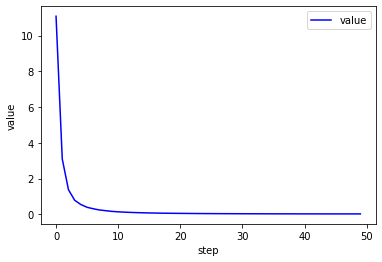

In [26]:
plot_curve(data[1:])

In [16]:
#加载本地数据的类
class LocalDataset(Dataset):
    def __init__(self, data_list, label,transform=None):
        self.transform = transform
        self.x = data_list
        self.label = label

    def __getitem__(self, index):
        img = Image.open(self.x[index]).convert('RGB')
        if self.transform is not None:img = self.transform(img)
        return img[:,15:,:],torch.tensor(self.label.iloc[int(self.x[index][-8:-4])-110,[5]]),int(self.x[index][-8:-4])

    def __len__(self):
        return len(self.x)



#加载本地的数据集
def local_datasets(data_path,label,bt,PM,NM=0):
    numclass_path = glob(os.path.join(data_path, '*'))

    data_transform = {"train": tr.Compose([
        tr.Resize((329,428)),
        tr.ToTensor()])}

    train_dataset = LocalDataset(numclass_path,label,transform=data_transform["train"])
    train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=bt, shuffle=False,num_workers=NM,pin_memory=PM)

    return train_loader

In [17]:
import pandas as pd
label = pd.read_excel("/kaggle/input/apcmc/Attachment 2.xlsx")
train_loader= local_datasets('/kaggle/input/apcmc/Attachment 1/Attachment 1',label,1,True)

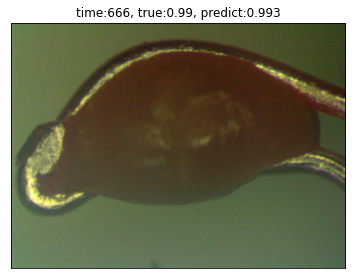

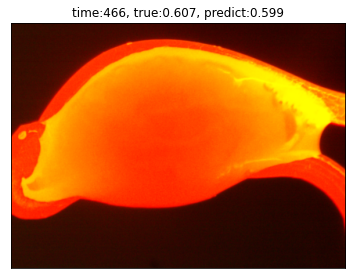

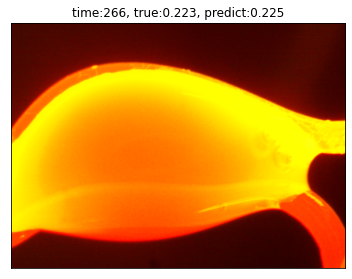

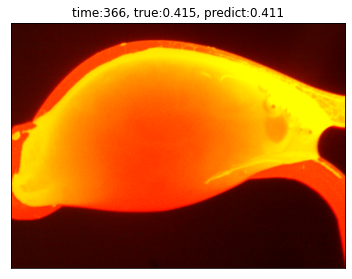

In [32]:
for step1,(x,y,idx) in enumerate(train_loader):
    if idx.item() == 366 or idx.item() == 266 or idx.item() == 466 or idx.item() == 666:
        plot_image(x, y,idx,net(x.to(device)))